# Linear regression in TensorFlow

Author: Juvid Aryaman

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
sys.path.append("..")
import utls

In [3]:
utls.reset_plots()

## Import data

In [4]:
d = pd.read_csv("../../assignments/week_1/poverty.txt",delimiter="\t")
d.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [5]:
d.shape

(51, 6)

## Perform linear regression using TensorFlow

Our task is to perform linear regression of `Brth15to17` (dependent variable) against `PovPct` (independent variable) using `TensorFlow`. We wish to set up a `TensorFlow` graph which can accept a variable amount of data points, and a variable number of features. 

Let $A \in \mathbb{R}^{m,(N+1)}$ be the design matrix where we have $m$ data points, each consisting of $N$ features, which has been concatenated with a column of ones as the final column. Also let $b \in \mathbb{R}^m$ be a vector of data points which consist of the target.

In [6]:
A = tf.placeholder(tf.float32,shape=[None,None],name="A") # design matrix (with a column of ones)
b = tf.placeholder(tf.float32, shape=[None],name="b") # target

Check consistency of data types

In [7]:
d['Brth15to17'].dtype, d['PovPct'].dtype, d['ViolCrime'].dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

Construct numpy array for the data to populate `A`

In [8]:
pov = np.column_stack((d['PovPct'].values, np.ones(len(d))))
pov.shape

(51, 2)

Construct numpy array for the data to populate `b`

In [9]:
brth = d['Brth15to17'].values
brth.shape

(51,)

Define the normal equation for linear regression

In [10]:
A_trans = tf.transpose(A)
x = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(A_trans,A)),A_trans),tf.expand_dims(b,axis=1))
print(x)

Tensor("MatMul_2:0", shape=(?, 1), dtype=float32)


Check if our global variables before running a session

In [11]:
print(tf.global_variables())

[]


None, as expected. We don't need any variables, we are doing an operation on a bunch of constant tensors, because we can write down the solution in closed-form. No need to have $x$ as a variable, although you could also determine it using stochastic gradient descent of course. Now run the session.

In [12]:
with tf.Session() as sess:    
    x_bth_pov = sess.run(x, feed_dict= {A:pov,b:brth})
    print(x_bth_pov)
    

[[1.373352]
 [4.267201]]


Check the result with more familiar tools:

In [13]:
from scipy.stats import linregress

In [14]:
slope, intercept, r, p, std = linregress(d['PovPct'],d['Brth15to17'])
slope, intercept

(1.3733453886953968, 4.267292842407439)

so it worked!

## Plot

Text(5, 40, '$y = 1.4x + 4.3$')

/home/juvid/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


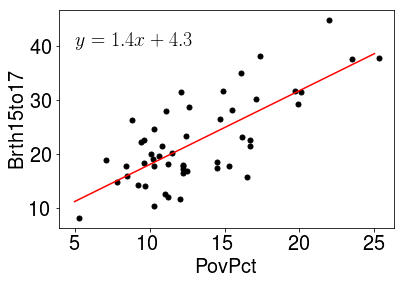

In [15]:
fig, ax = plt.subplots(1,1)
ax.plot(d['PovPct'],d['Brth15to17'],'.k')
utls.remove_tex_axis(ax)
ax.set_xlabel('PovPct')
ax.set_ylabel('Brth15to17')

x_sp = np.linspace(5,25)
m, c = x_bth_pov.ravel()
y  = m*x_sp + c

ax.plot(x_sp, y, '-r')
ax.annotate("$y = {0:.1f}x + {1:.1f}$".format(m,c),[5,40])

## Multiple linear regression

Now let's regress `Brth15to17` against `PovPct` and `ViolCrime` _using the same `TensorFlow` graph_

In [16]:
pov_viol = np.column_stack((d['PovPct'].values, d['ViolCrime'], np.ones(len(d))))
pov_viol.shape

(51, 3)

In [17]:
pov_viol.dtype, brth.dtype

(dtype('float64'), dtype('float64'))

In [18]:
with tf.Session() as sess: 
    x_bth_pov_viol = sess.run(x, feed_dict= {A:pov_viol,b:brth})
    print(x_bth_pov_viol)

[[1.0365039 ]
 [0.34420684]
 [5.9821377 ]]


So, allowing
$$\text{Brth15to17} = y$$
$$\text{PovPct}=x_1$$
$$\text{ViolCrime}=x_2$$
then
$$y = 1.04 x_1 + 0.34 x_2 + 5.98$$